In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

df = pd.read_csv('../dataset/CustomersTransactions2021.csv')

In [70]:
df.head()

,customer_id,id,txn_type,txn_total,Customers,Products,Province,Relationship,Category
0,1001,1,Debit,165.78,Johnny Awesome,3,ON,1,wealth
1,1001,2,Credit,42.10,Johnny Awesome,3,ON,1,wealth
2,1001,4,Credit,103.03,Johnny Awesome,3,ON,1,wealth
3,1001,5,Credit,56.60,Johnny Awesome,3,ON,1,wealth
4,1002,6,Debit,214.34,Bob Marley,4,ON,1,personal_banking


In [71]:
df.columns

Index(['customer_id', 'id', 'txn_type', 'txn_total', 'Customers', 'Products',
       'Province', 'Relationship', 'Category'],
      dtype='object')

In [72]:
df['Products'].unique()

array([3, 4, 2, 5, 1])

In [73]:
df['Relationship'].unique()

array([ 1,  2,  4,  3,  5, 10])

In [74]:
df['txn_type'].unique()

array(['Debit', 'Credit', 'Cash'], dtype=object)

In [75]:
df['txn_total'].unique()

array([165.78,  42.1 , 103.03,  56.6 , 214.34, 115.69,  21.37, 227.58,
         5.92, 225.89,  67.96, 449.39, 183.08, 235.79,  15.26, 255.21,
       160.89, 393.91, 256.6 , 377.26,  94.32, 438.29, 276.01, 403.62,
       122.06, 190.02, 242.73, 166.44, 320.4 , 230.24, 307.91, 328.72,
        87.38, 266.3 ])

getting row count

In [76]:
len(df)

34

In [77]:
df.shape[0]

34

get maximum amount spent

In [78]:
df['txn_total'].max()

449.39

In [79]:
df['txn_total'].describe()

count     34.000000
mean     207.296765
std      124.283187
min        5.920000
25%      106.195000
50%      220.115000
75%      273.582500
max      449.390000
Name: txn_total, dtype: float64

generate random values for account balance

In [80]:
import numpy as np

df['account_balance'] = np.random.randint(500, 5000, size=len(df))

In [81]:
df.head()

,customer_id,id,txn_type,txn_total,Customers,Products,Province,Relationship,Category,account_balance
0,1001,1,Debit,165.78,Johnny Awesome,3,ON,1,wealth,2886
1,1001,2,Credit,42.10,Johnny Awesome,3,ON,1,wealth,4503
2,1001,4,Credit,103.03,Johnny Awesome,3,ON,1,wealth,711
3,1001,5,Credit,56.60,Johnny Awesome,3,ON,1,wealth,1987
4,1002,6,Debit,214.34,Bob Marley,4,ON,1,personal_banking,4989


Study the relationship between account balance and transaction amount 

AttributeError: Text.set() got an unexpected keyword argument 'labelpad'

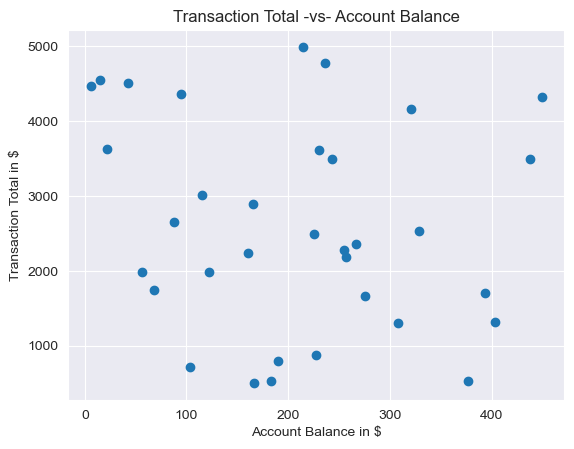

In [82]:
plt.scatter(x=df['txn_total'], y=df['account_balance'])

plt.xlabel('Account Balance in $')
plt.ylabel('Transaction Total in $')
plt.title('Transaction Total -vs- Account Balance', rotation=0, labelpad=40)

plt.show()

Using Seaborn

In [ ]:
import seaborn as sns

In [ ]:
sns.scatterplot(x='txn_total', y='account_balance', data=df)

In [ ]:
sns.lmplot(x='txn_total', y='account_balance', data=df)

<Axes: xlabel='txn_total', ylabel='account_balance'>

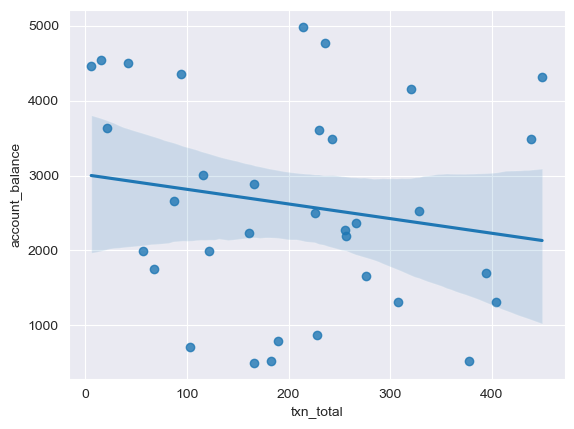

In [83]:
sns.regplot(x='txn_total', y='account_balance', data=df)

Using PlotlyExpress

In [84]:
px.scatter(df, x='txn_total', y='account_balance', trendline="ols")

Seaborn -> boxplot:

In [85]:
df['Category'].unique()

array(['wealth', 'personal_banking', 'hnw'], dtype=object)

<Axes: xlabel='Category', ylabel='txn_total'>

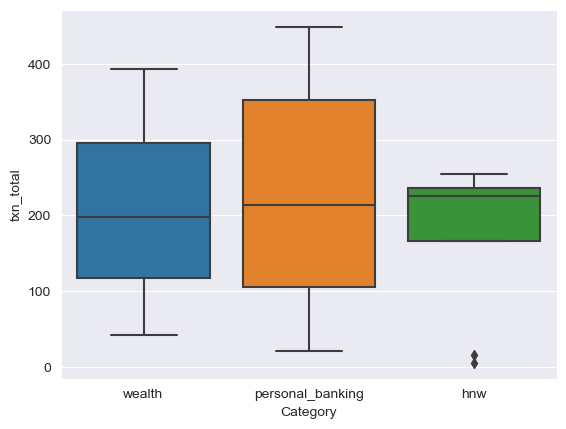

In [86]:
sns.boxplot(x='Category', y='txn_total', data=df)

In [87]:
px.box(x='Category', y='txn_total', color='Category', data_frame=df)

Pair-plot

In [88]:
needed_cols = ['txn_type', 'txn_total', 'Customers', 'Products', 'Province', 'account_balance', 'Relationship',
               'Category']

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



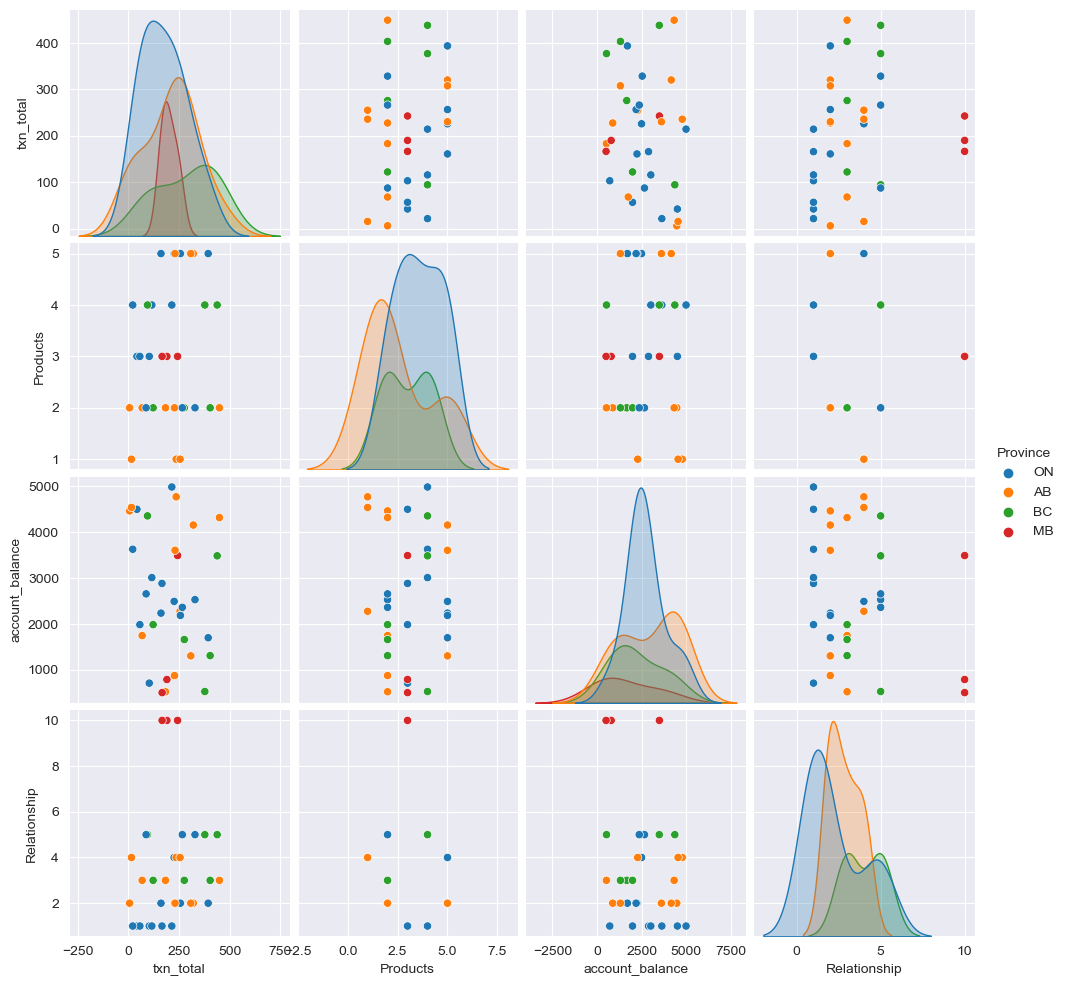

In [89]:
sns.pairplot(df[needed_cols], hue='Province')

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



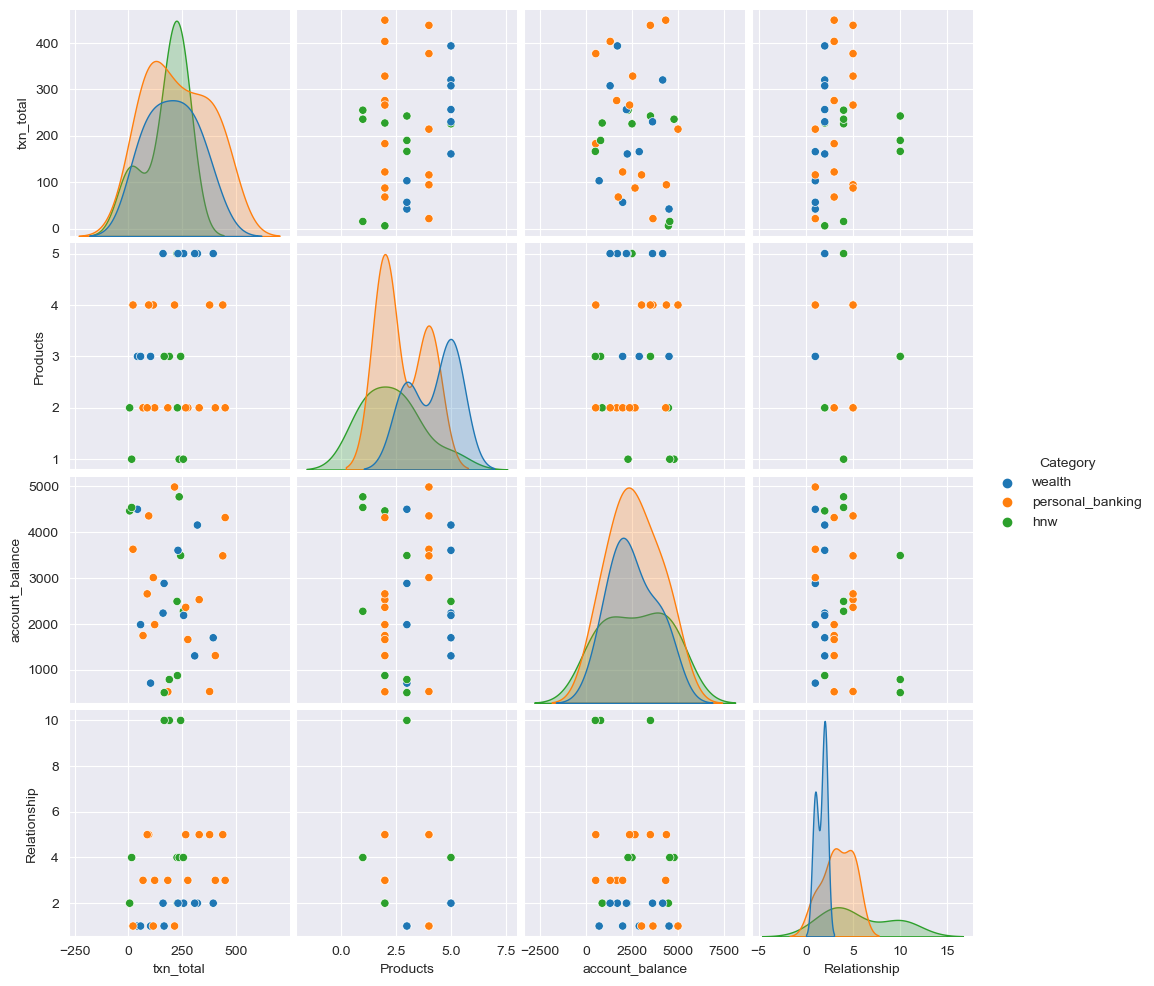

In [90]:
sns.pairplot(df[needed_cols], hue='Category')

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



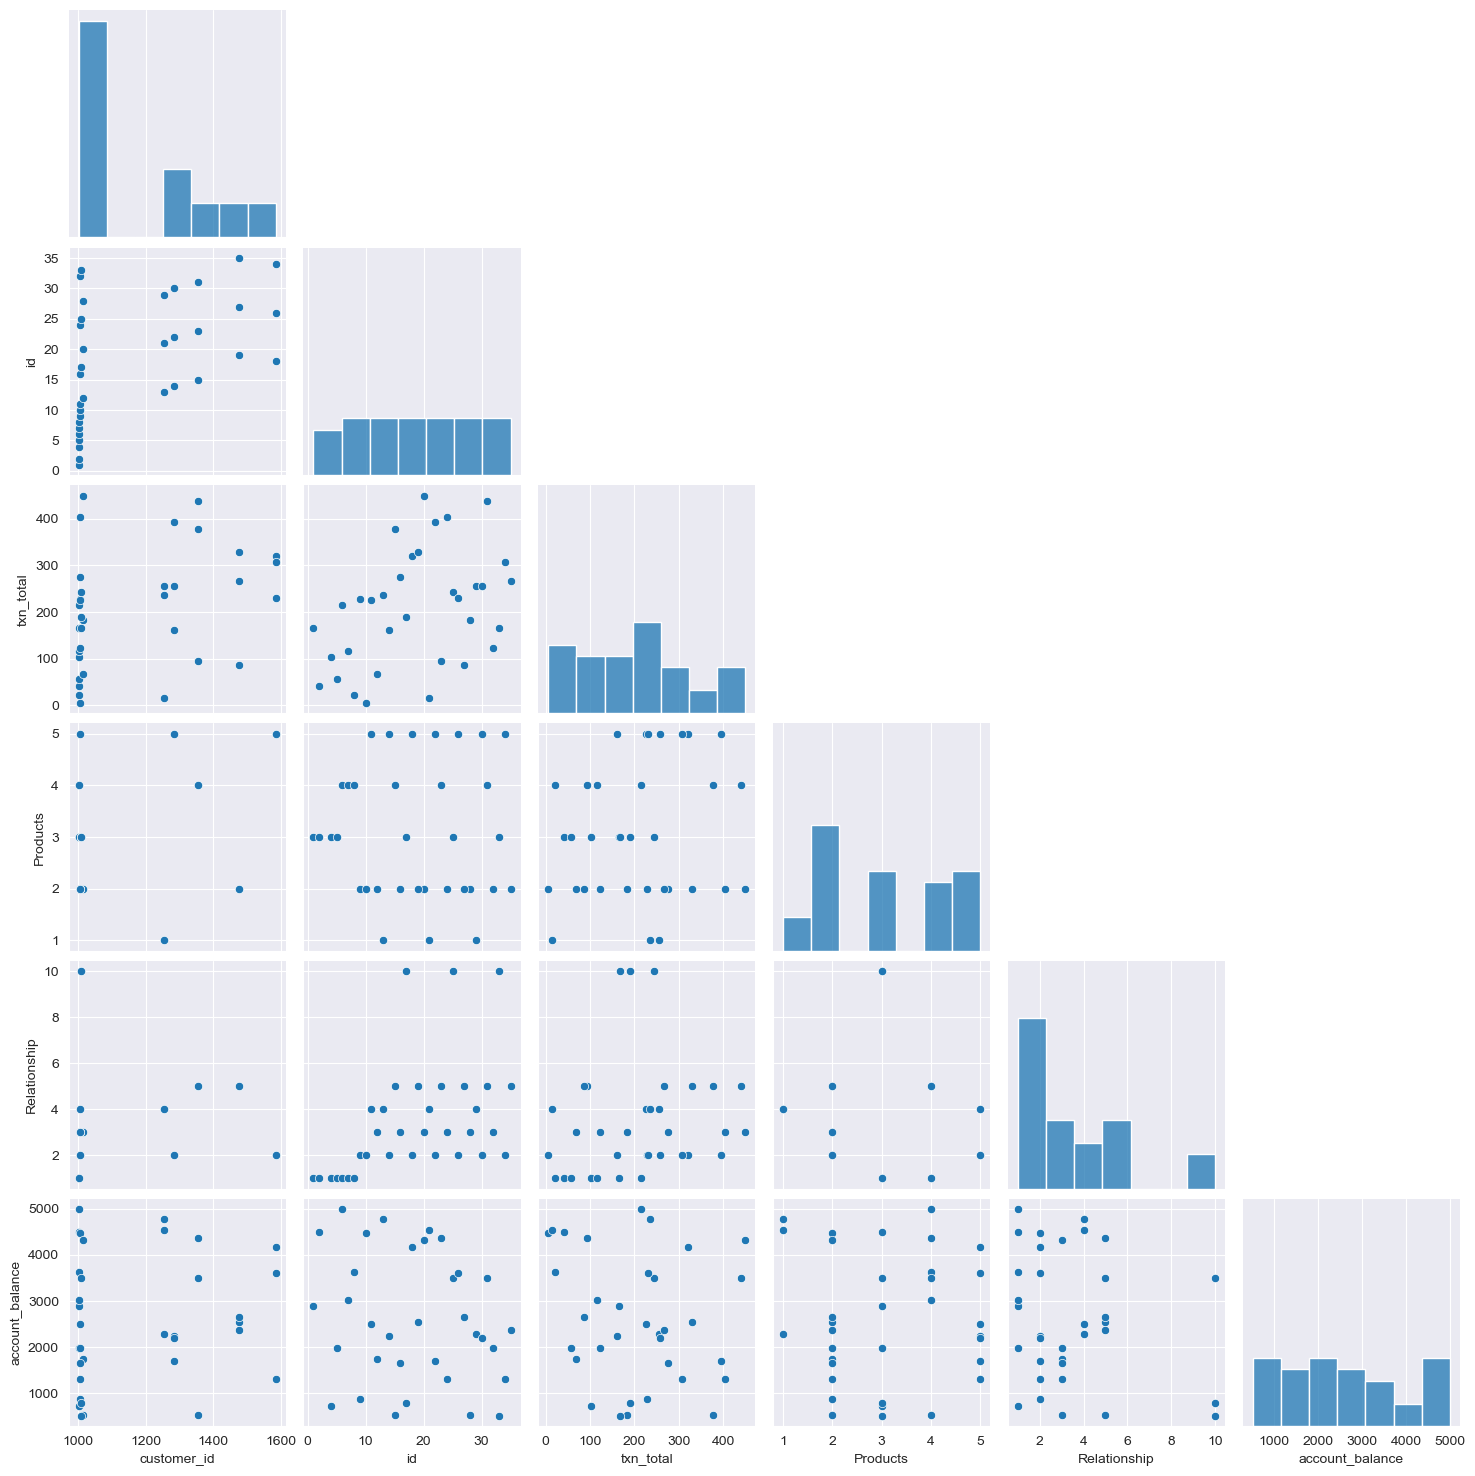

In [91]:
sns.pairplot(df, corner=True)

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



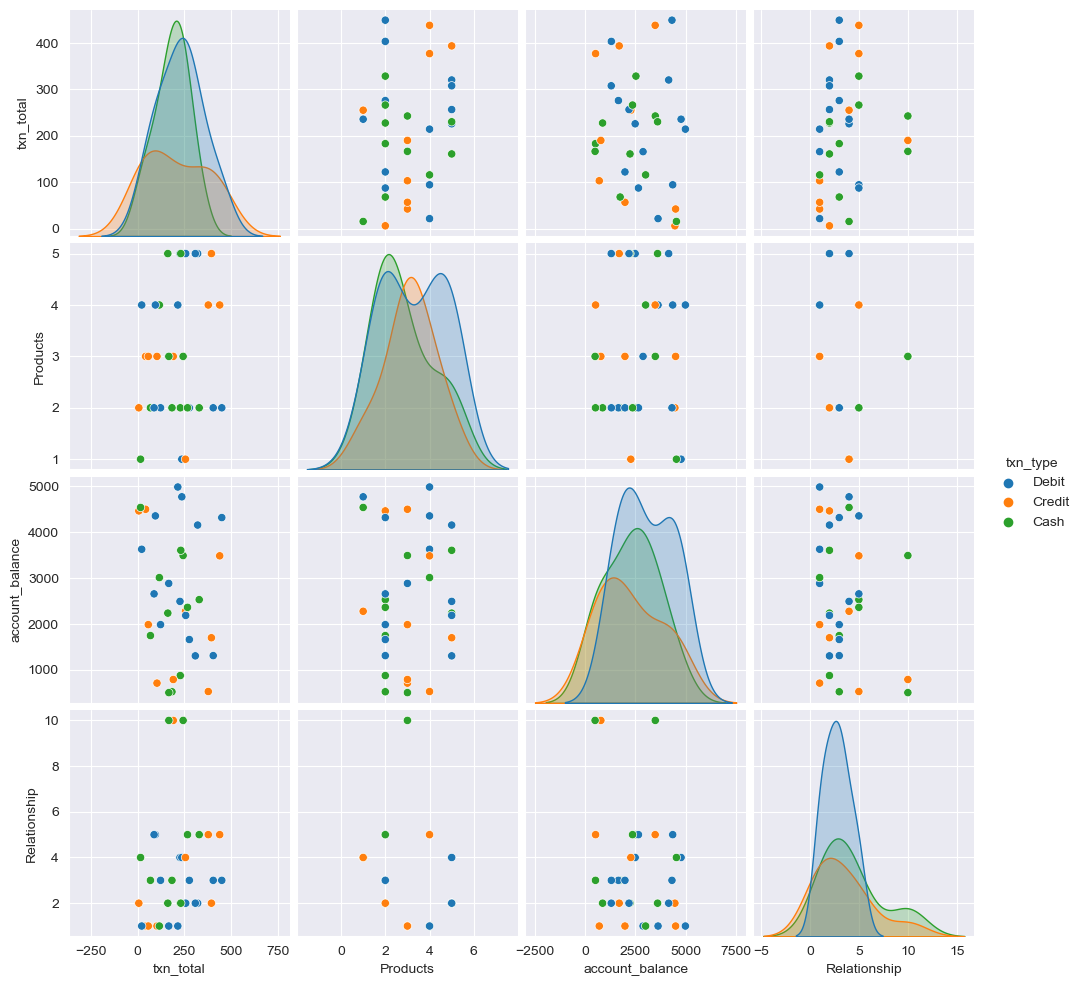

In [92]:
# sns.pairplot(df)

sns.pairplot(df[needed_cols], hue='txn_type')

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



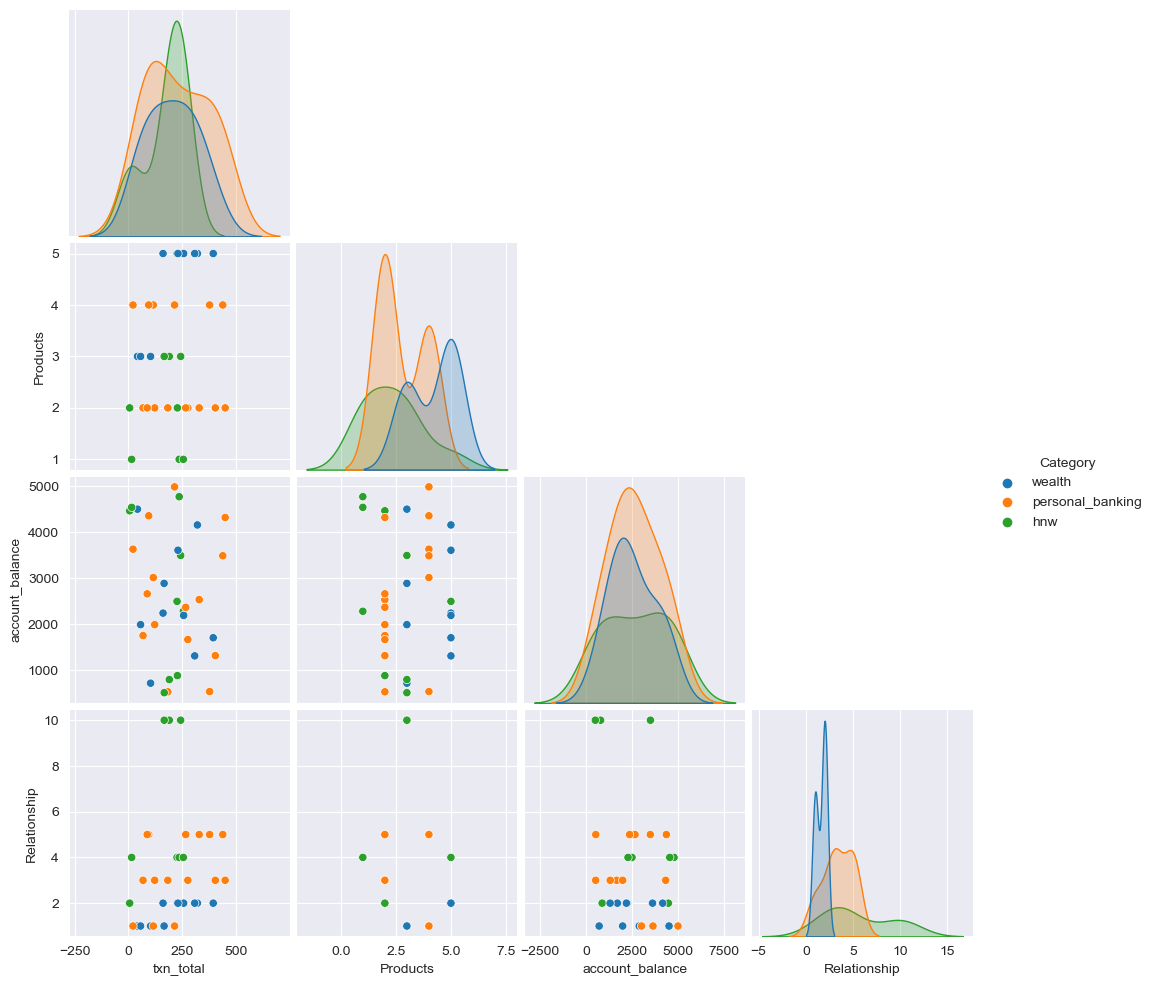

In [93]:
sns.pairplot(df[needed_cols], hue='Category', corner=True)

Heatmaps

<Axes: >

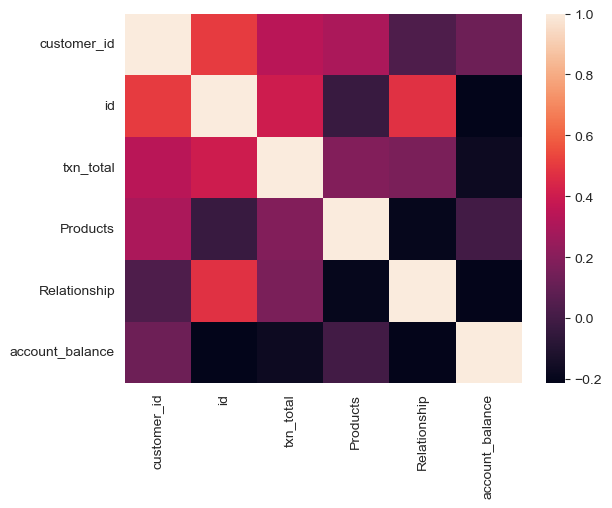

In [94]:
sns.heatmap(df.corr(numeric_only=True))

<Axes: >

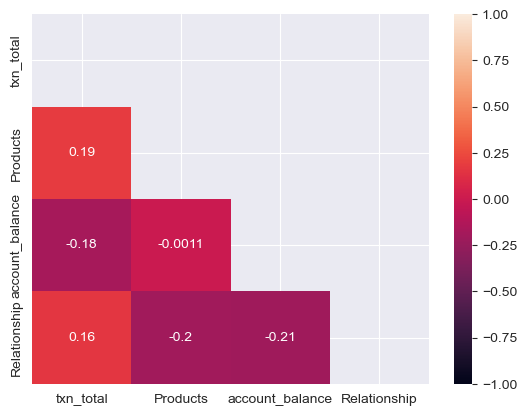

In [108]:
correlations = df[needed_cols].corr(numeric_only=True)

sns.heatmap(correlations, annot=True, vmin=-1, vmax=1,
            mask=np.triu(correlations))

BubblePlot

<Axes: xlabel='txn_total', ylabel='Relationship'>

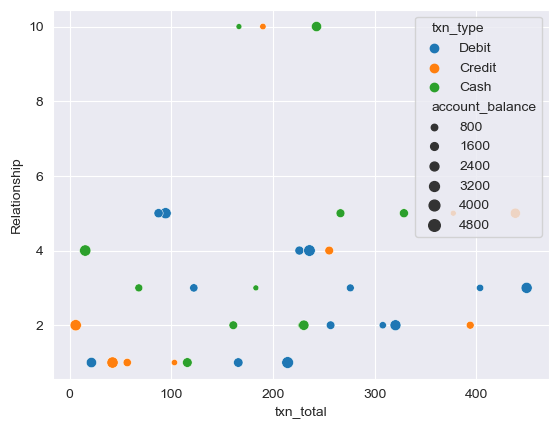

In [111]:
sns.scatterplot(data=df, x='txn_total', y='Relationship', hue='txn_type', size='account_balance')

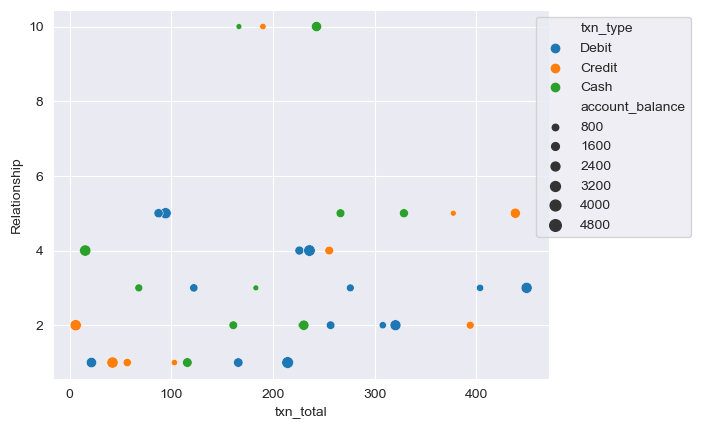

In [119]:
sns.scatterplot(data=df, x='txn_total', y='Relationship', hue='txn_type', size='account_balance')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

Pie charts

Synthax: `plt.pie(x_array, [explode], labels, [autopct])`

> x_array: array of slice-sizes
> [explode]: array containing the offset(gap) from the overall pie
> [autopct]: show the percentage inside the slides, can be formatted

([<matplotlib.patches.Wedge at 0x3228a6810>,
 [Text(7.34788079488412e-17, 1.2000000000000002, 'A'),
  Text(-0.7778174593052025, -0.7778174593052023, 'B'),
  Text(0.5894094953465407, -0.9287607048079373, 'C'),
  Text(1.073508449141181, -0.23995751628673068, 'D')],
 [Text(4.286263797015736e-17, 0.7, '50.00%'),
  Text(-0.4242640687119286, -0.42426406871192845, '25.00%'),
  Text(0.32149608837084037, -0.5065967480770566, '18.00%'),
  Text(0.5855500631679169, -0.13088591797458035, '7.00%')])

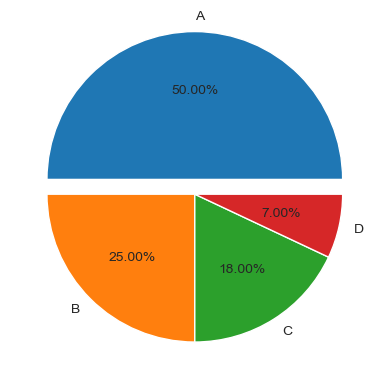

In [126]:
plt.pie(
    [.5, .25, .18, .07],
    explode=[.1, 0, 0, 0],
    labels=['A', 'B', 'C', 'D'],
    autopct='%1.2f%%',
)

In [ ]:
px.pie(data_frame=df, )